1.Scipy - обрезка изображения

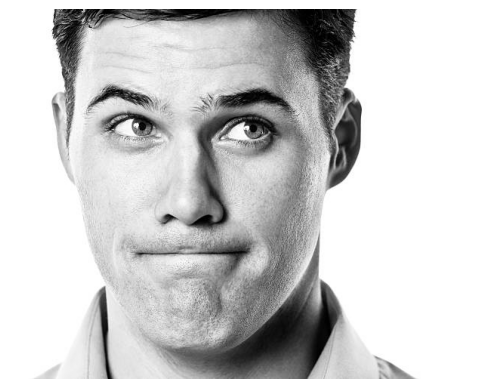

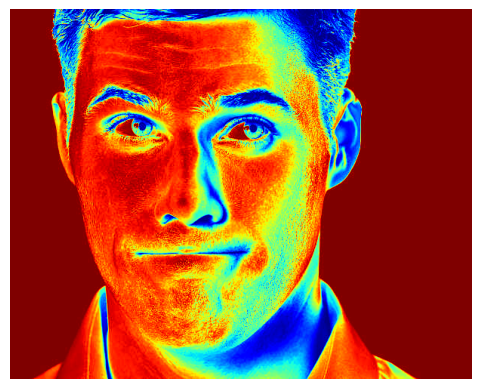

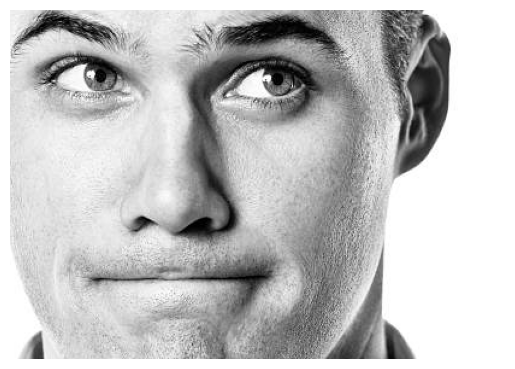

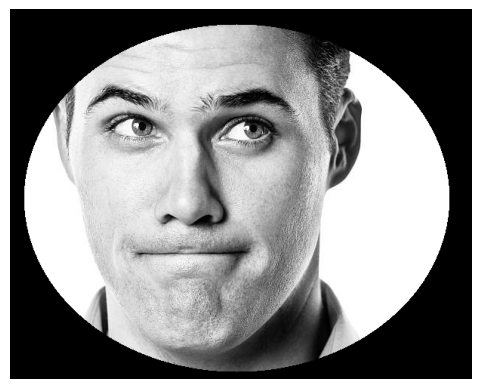

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

face = mpimg.imread('/home/honeytoxant/home/Desktop/Python/DPO/5ex/face.jpg')
face = face.copy()
plt.axis('off')
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

plt.imshow(face, cmap=plt.cm.jet)
plt.axis('off')
plt.show()

crop_face = face[100:-100, 100:-100]
plt.axis('off')
plt.imshow(crop_face, cmap=plt.cm.gray)
plt.show()

sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx] # x и y обозначают пиксели
y.shape, x.shape
centerx, centery = (300, 250) # центр изображения
mask = ((y - centery)**2 + ((x - centerx)**2)/1.5) > 230**2

face[mask] = 0
plt.axis('off')
plt.imshow(face, cmap=plt.cm.gray)   


2 - Работа со статистикой

Средние значения:  34081 42400 20167
Отклонение:  20898 3323 16255
Морковь: 1900.0
Зайцы: 1903.0
Рыси: 1904.0
['C' 'C' 'H' 'H' 'L' 'L' 'C' 'C' 'C' 'C' 'C' 'C' 'H' 'H' 'H' 'L' 'C' 'C'
 'C' 'C' 'C']
[1902. 1903. 1904. 1912. 1913. 1914. 1915.]
[1917. 1916.] [1900. 1901.] [1916. 1903.]
Разница = -0.9179248480315341


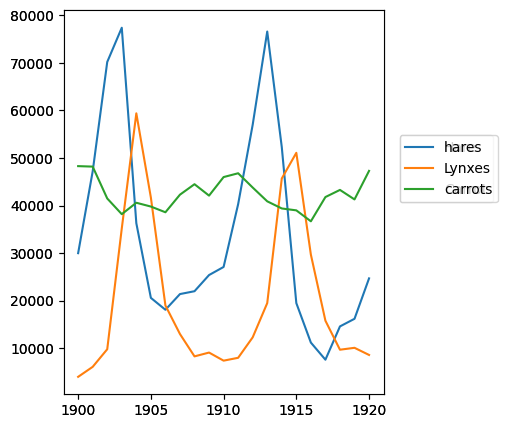

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import std
from statistics import mean

data = np.loadtxt('https://scipy-lectures.org/_downloads/populations.txt')
year, hares, lynxes, carrots = data.T
plt.axes([0.2, 0.1, 0.5, 0.8])
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

meanHares = mean(hares)
meanLynxes = mean(lynxes)
meanCarrots = mean(carrots)
print("Средние значения: ",round(meanHares),round(meanCarrots),round(meanLynxes))

stdHares = std(hares)
stdCarrots = std(carrots)
stdLynxes = std(lynxes)
print("Отклонение: ",round(stdHares),round(stdCarrots),round(stdLynxes))

max_index_carrots = np.argmax(carrots)
max_index_lynxes = np.argmax(lynxes)
max_index_hares = np.argmax(hares)
print(f"Морковь: {year[max_index_carrots]}")
print(f"Зайцы: {year[max_index_hares]}")
print(f"Рыси: {year[max_index_lynxes]}")


chars = np.array(['H', 'L', 'C'])
max_pop = chars[np.argmax(np.column_stack((hares, lynxes, carrots)), axis=1)]
print(max_pop)

years50000 = year[np.any(data[:,1:] > 50000, axis=1)]
print(years50000)

hares_top_2 = year[np.argsort(hares)[:2]]
lynxes_top_2 = year[np.argsort(lynxes)[:2]]
carrots_top_2 = year[np.argsort(carrots)[:2]]
print(hares_top_2, lynxes_top_2, carrots_top_2)

hare_grad = np.gradient(hares, 1.0)
print("Разница =", np.corrcoef(hare_grad, lynxes)[0,1])

plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('hares', 'Lynxes', 'carrots'), loc=(1.05, 0.5))


Задание 3. Множество Мандельброта.

/tmp/ipykernel_195402/1219219584.py:12: RuntimeWarning: overflow encountered in square
  z=z**2+c
/tmp/ipykernel_195402/1219219584.py:12: RuntimeWarning: invalid value encountered in square
  z=z**2+c


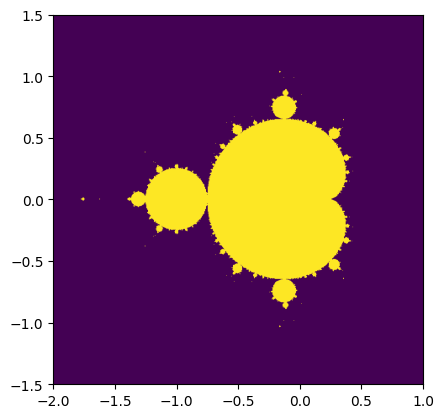

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

def compute_maldelbrot(N_max, some_threshold, nx, ny):
    x= np.linspace(-2,1, nx)
    y=np.linspace(-1.5,1.5, ny)
    c=x[:,newaxis]+1j*y[newaxis, :]

    z = c
    for j in range(N_max):
        z=z**2+c

    mandelbrot_set = (abs(z) < some_threshold)
    return mandelbrot_set

mandelbrot_set = compute_maldelbrot(500,6,440,1000)

plt.imshow(mandelbrot_set.T, extent=[-2,1,-1.5,1.5])